<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0613/0613_02_4_RNN_%EA%B0%9C%EC%B2%B4%EB%AA%85%EC%9D%B8%EC%8B%9D_%EC%98%81%EC%96%B4(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 튜토리얼 자료입니다.

링크 : https://wikidocs.net/147219

### 데이터 전처리

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/ner_dataset.csv", filename="ner_dataset.csv")
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [3]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
print('데이터프레임 행의 개수 : {}'.format(len(data)))

데이터프레임 행의 개수 : 1048575


In [5]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True


In [6]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [7]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [8]:
print('Tag 열의 각각의 값의 개수 카운트')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag 열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [9]:
data = data.fillna(method="ffill")

In [10]:
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [11]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [12]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 31817


In [13]:
print(data[:5])

    Sentence #           Word  POS Tag
0  Sentence: 1      thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O


In [14]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 개수: {}".format(len(tagged_sentences)))

전체 샘플 개수: 47959


In [15]:
print(tagged_sentences[0]) # 첫번째 샘플 출력

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [16]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences: # 47,959개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [17]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [18]:
print(sentences[98])
print(ner_tags[98])

['she', 'had', 'once', 'received', 'a', 'kidney', 'transplant', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


### 문제1. 문장 길이의 분포를 살펴보고, 적절한 패딩 길이를 선택하세요
(여기서 부터 실습)

문장의 최대 길이(단어 개수) :  104 
 문장 평균 길이(평균 단어 개수) : 21.863988


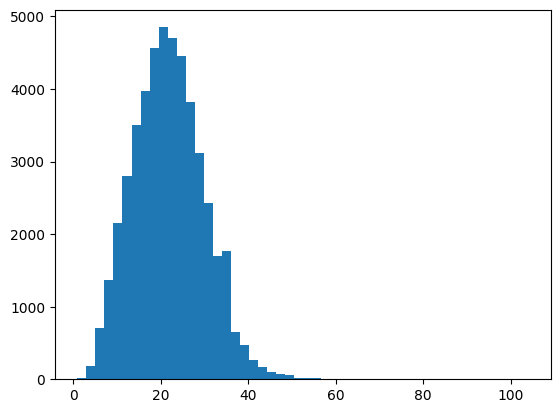

In [174]:
sent = [len(x) for x in sentences]
print('문장의 최대 길이(단어 개수) : ',max(sent),'\n','문장 평균 길이(평균 단어 개수) : {:.6f}'.format(sum(sent)/len(sent)))

plt.figure()
plt.hist(sent, bins=50)

plt.show()

In [ ]:
# 단어 개수가 60개 이상인 것들만 모으겠다
# 방법 1
sent_len_list = [idx for idx, sen in enumerate(sentences) if len(sen) > 60]
sent_len_list

In [ ]:
# 방법 2
import numpy as np
len_arr = np.array(sent_len_list)
len_arr

In [ ]:
# 방법 2-1 해당 조건이 맞는 array 가져온다
len_arr[len_arr > 60]

In [ ]:
# 방법 2-2 리스트라서, where : 해당하는 인덱스 가져옴
np.where(len_arr>60)

### 문제2. 데이터 전처리
- 토큰을 정수로 라벨링하세요 --> X와 y 각각 정수로 변환되어야 합니다.
- 패딩을 통해 행렬로 변환하세요

In [175]:
# X 데이터
## 전처리 순서 : cleaning >> Token 단위로 나누기 >> Token을 정수로 인코딩 >> 패딩 >> Embedding
# cleaning : 날짜 등 문자 외 정보 필요해서 크게 하지 않음
# 영어라서 띄어쓰기 단위로 나눠도 잘 나눠진다
sentences[0] # 토큰화 그대로 쓰기로 함

['thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'london',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'british',
 'troops',
 'from',
 'that',
 'country',
 '.']

In [ ]:
# Y 데이터 -> 다중분류 모델 -> Loss : Cross Entropy
## Cross Entropy : 각 카테고리별로 이 데이터가 속할 확률들이 1개의 벡터로 나타난다,
### 실제 y의 벡터와 예측한 y의 벡터를 비교하여 예측값과 실제값의 거리를 나타내주는 것이 Cross Entropy다.

# y 데이터 -> One Hot Vector(각 카테고리에 속하면 1, 아니면 0 으로 표시되어 있는) -> Vector size : 카테코리 개수
# One Hot Vector를 쓰기 싫다면 아래와 같이 정수로 쓸 수 있다
# y 데이터 -> 정수 (각 카테고리로 라벨 인코딩되어 있는 형태) -> Loss : Sparse Categorical CrossEntropy

ner_tags[0] # 카테고리가 몇 개 있는지 확인이 필수

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# X 데이터의 tokenizer
src_tokenizer = Tokenizer(split = ' ', char_level = False, lower = False, oov_token = 'OOV')
# char_level = T/F : 나눈 단어를 토큰으로 쓰겠다 T/F
# lower = T/F : 모두 소문자로 바꾼다 T/F
# oov_token = str : 없는 단어는 str로 바꾼다, str은 인덱스 1에 할당한다.

# y 데이터의 tokenizer
tar_tokenizer = Tokenizer(split = ' ', char_level = False, lower = False)

# 단어 Tokenizer fitting
src_tokenizer.fit_on_texts(sentences)

# 라벨 Tokenizer fitting
tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
# 강사님 코드
# src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
# src_tokenizer.fit_on_texts(sentences)

# tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
# tar_tokenizer.fit_on_texts(ner_tags)

In [22]:
# 단어 집합의 크기
vocab_size = len(src_tokenizer.word_index)+1

# 개체명 태깅 정보 집합의 크기
tag_size =len(tar_tokenizer.word_index)+1

print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [ ]:
# # 강사님 코드
# len(src_tokenizer.word_index) # 코퍼스 내에 unique한 단어 개수 확인

In [ ]:
# # 강사님 코드
# tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
# tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
# # 강사님 코드
# tar_tokenizer.word_index # 인덱스를 통해 카테고리 개수 확인

In [24]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [ ]:
# 데이터 라벨 인코딩
X = src_tokenizer.texts_to_sequences(sentences)
X

In [27]:
print(len(X), len(sentences))

47959 47959


In [ ]:
y = tar_tokenizer.texts_to_sequences(ner_tags)
y

In [46]:
print(len(y), len(ner_tags))

47959 47959


In [ ]:
# # 강사님 코드
# X_data = src_tokenizer.texts_to_sequences(sentences)
# y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [ ]:
tar_tokenizer.word_index

In [ ]:
# # 강사님 코드
# print(X_data[0])
# print(y_data[0])

In [31]:
# 데이터 라벨 인코딩
print(X[0],'\n',y[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3] 
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [33]:
# 단어 딕셔너리 저장
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD' # 인덱스 0에 단어 추가

In [35]:
print(index_to_ner) # index_to_ner가 잘 되어 있는지 확인

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [37]:
sum(x < 70 for x in sent)/len(sent) # 문장 길이가 70이면 문장의 99.9% 활용 가능

0.9998540419942034

In [38]:
index_to_ner.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0])

In [48]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAXLEN = 70
X_data = pad_sequences(X, maxlen = MAXLEN)

# y데이터와 x데이터의 모양을 일치시키기 위해서 y데이터도 패딩해준다
y_data = pad_sequences(y, maxlen = MAXLEN)

In [49]:
# Train Test Split
from sklearn.model_selection import train_test_split

# 순서 바뀌면 안됨, 엉뚱한 데이터 들어감
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size =0.2, shuffle= True)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(38367, 70) (38367, 70) (9592, 70) (9592, 70)


In [51]:
y_train

array([[0, 0, 0, ..., 4, 7, 1],
       [0, 0, 0, ..., 2, 9, 1],
       [0, 0, 0, ..., 8, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [ ]:
# # 강사님 코드
# print(X_data.shape)
# print(y_data.shape)

In [ ]:
# # 강사님 코드
# X_train, X_test, y_train_int, y_test_int = train_test_split(X_data, y_data, test_size=.2, random_state=777)

In [ ]:
# # 강사님 코드
# X_train, X_test, y_train_int, y_test_int

In [ ]:
# # y data 원핫인코딩 : 강사님 코드

# y_train = to_categorical(y_train_int, num_classes=tag_size)
# y_test = to_categorical(y_test_int, num_classes=tag_size)

In [57]:
# y data 원핫인코딩
from tensorflow.keras.utils import to_categorical

y_train_int = tf.keras.utils.to_categorical(y_train, num_classes=18)
y_test_int = tf.keras.utils.to_categorical(y_test, num_classes=18)
print(y_train_int[0],'\n','\n',y_test_int[0] )

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 
 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [58]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('테스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블(정수 인코딩)의 크기 : (38367, 70, 18)
훈련 샘플 레이블(원-핫 인코딩)의 크기 : (38367, 70)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블(정수 인코딩)의 크기 : (9592, 70, 18)
테스트 샘플 레이블(원-핫 인코딩)의 크기 : (9592, 70)


#### 모델 설명

In [ ]:
# 단어로 어떤 단어인지 맞추는 모델을 만들어야 한다
x = ['John', 'loves', 'cats']
y = ['사람이름', 'o', 'o']

In [ ]:
x = [1, 2, 3] '>>'  y = [1, 2, 3]
# 단어를 정수로 바꾸었기 때문에 x의 1과 y의 1이 의미하는 바가 다르다
X_idx = {'John':1, 'loves':2, 'cats':3}

y_idx = {'사람이름' :1, 'o':2, '지역이름':3}

# # 정수 -> 벡터
# X 데이터 : Embedding 레이어
# y 데이터 : One Hot 벡터 -> 그래야 소프트멕스 결과값과 CrossEntropy 계산이 가능해진다!
#     1. to_categorical : 미리 바꿔주거나
#     2. loss -> spare CE : tensorflow가 바꿔서 계산한다.

# RNN을 이용한 개체명 인식

## 모델링

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM

In [ ]:
# # 강사님 코드
# Embedding(input_dim = 'X : unique한 단어의 개수', output_dim = 'hyper params')

# vocab_size = len(src_tokenizer.word_index) + 1

In [ ]:
# # 강사님 코드
# embedding_dim = 128
# hidden_units = 256

# model = Sequential() # embedding_dim만 바꿀 수 있음, 나머지 바뀌면 안됨
# model.add(Embedding(vocab_size, embedding_dim, mask_zero=True)) # mask_zero = : 0을 패딩으로 썼는가, 아닌가 True면 zero는 계산하지 않는다
# model.add(LSTM(hidden_units, return_sequences=True)) # return_sequences=False로 주면 모델이 생성되지 않는다, 반드시 True로 줘야한다
# model.add(Dense(tag_size, activation=('softmax'))) # output layer의 노드개수 == category 개수 (다중 분류), tag_size = 카테고리 개수
# model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
# y데이터가 원 핫 인코딩을 한 데이터라서 loss='categorical_crossentropy', 원 핫 인코딩 X = 'sparse_categorical_crossentropy'

In [ ]:
# John loves cats -> S, V, O

# John -> S : 1, [1, 0, 0]
# Loves -> V : 2, [0, 1, 0]
# Cats -> O : 3, [0, 0, 1]

# y 데이터를 1, 2, 3 으로 쓴다면 sparse_categorical_crossentropy, [1,0,0].. 으로 쓸거면 categorical_crossentropy

In [168]:
model = Sequential()
model.add(Embedding(31819, 18, input_length = 70)) # 31819 : 단어 총 개수, input_length = input 길이를 동일하게 맞춰놓는다
model.add(GRU(10, input_shape = (70,18), return_sequences=True, name='GRU-1'))
model.add(Dense(18, activation = 'softmax'))

In [157]:
model = Sequential()
model.add(Embedding(31819, 18, input_length = 70))
model.add(LSTM(10, input_shape = (70,18), return_sequences=True, name='LSTM-1'))
model.add(Dense(18, activation = 'softmax'))

In [158]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 70, 18)            572742    
                                                                 
 LSTM-1 (LSTM)               (None, 70, 10)            1160      
                                                                 
 dense_8 (Dense)             (None, 70, 18)            198       
                                                                 
Total params: 574,100
Trainable params: 574,100
Non-trainable params: 0
_________________________________________________________________


In [169]:
# 모델 컴파일
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_crossentropy', 'accuracy'])

In [ ]:
# # 강사님 코드
# history = model.fit(X_train, y_train, batch_size=128, epochs=6, validation_split=0.1)

In [170]:
# 모델 학습 =
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

EPOCHS = 6

model_save = ModelCheckpoint(filepath = 'best_model.h5', verbose = 1, save_best_only = True)

es = EarlyStopping(monitor = 'var_loss', patience = 3)

history = model.fit (X_train, y_train, epochs = EPOCHS, batch_size = 64, validation_split = 0.2, callbacks = [model_save, es])

Epoch 1/6
480/480 [==============================] - ETA: 0s - loss: 0.7544 - sparse_categorical_crossentropy: 0.7544 - accuracy: 0.8491
Epoch 1: val_loss improved from inf to 0.22949, saving model to best_model.h5


480/480 [==============================] - 23s 43ms/step - loss: 0.7544 - sparse_categorical_crossentropy: 0.7544 - accuracy: 0.8491 - val_loss: 0.2295 - val_sparse_categorical_crossentropy: 0.2295 - val_accuracy: 0.9526
Epoch 2/6
479/480 [============================>.] - ETA: 0s - loss: 0.1783 - sparse_categorical_crossentropy: 0.1783 - accuracy: 0.9580
Epoch 2: val_loss improved from 0.22949 to 0.13934, saving model to best_model.h5


480/480 [==============================] - 18s 37ms/step - loss: 0.1783 - sparse_categorical_crossentropy: 0.1783 - accuracy: 0.9580 - val_loss: 0.1393 - val_sparse_categorical_crossentropy: 0.1393 - val_accuracy: 0.9665
Epoch 3/6
479/480 [============================>.] - ETA: 0s - loss: 0.1197 - sparse_categorical_crossentropy: 0.1197 - accuracy: 0.9702
Epoch 3: val_loss improved from 0.13934 to 0.10425, saving model to best_model.h5


480/480 [==============================] - 18s 37ms/step - loss: 0.1197 - sparse_categorical_crossentropy: 0.1197 - accuracy: 0.9702 - val_loss: 0.1042 - val_sparse_categorical_crossentropy: 0.1042 - val_accuracy: 0.9739
Epoch 4/6
479/480 [============================>.] - ETA: 0s - loss: 0.0907 - sparse_categorical_crossentropy: 0.0907 - accuracy: 0.9769
Epoch 4: val_loss improved from 0.10425 to 0.08344, saving model to best_model.h5


480/480 [==============================] - 18s 37ms/step - loss: 0.0907 - sparse_categorical_crossentropy: 0.0907 - accuracy: 0.9769 - val_loss: 0.0834 - val_sparse_categorical_crossentropy: 0.0834 - val_accuracy: 0.9804
Epoch 5/6
479/480 [============================>.] - ETA: 0s - loss: 0.0712 - sparse_categorical_crossentropy: 0.0712 - accuracy: 0.9832
Epoch 5: val_loss improved from 0.08344 to 0.07013, saving model to best_model.h5


480/480 [==============================] - 18s 37ms/step - loss: 0.0712 - sparse_categorical_crossentropy: 0.0712 - accuracy: 0.9832 - val_loss: 0.0701 - val_sparse_categorical_crossentropy: 0.0701 - val_accuracy: 0.9827
Epoch 6/6
479/480 [============================>.] - ETA: 0s - loss: 0.0590 - sparse_categorical_crossentropy: 0.0590 - accuracy: 0.9851
Epoch 6: val_loss improved from 0.07013 to 0.06287, saving model to best_model.h5


480/480 [==============================] - 18s 37ms/step - loss: 0.0590 - sparse_categorical_crossentropy: 0.0590 - accuracy: 0.9851 - val_loss: 0.0629 - val_sparse_categorical_crossentropy: 0.0629 - val_accuracy: 0.9837


In [ ]:
# # 강사님 코드
# model.save('bilstm.h5')

In [ ]:
# # 강사님 코드
# import tensorflow as tf
# tf.keras.utils.plot_model(model)

In [171]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[-1])) #GRU

300/300 [==============================] - 3s 9ms/step - loss: 0.0659 - sparse_categorical_crossentropy: 0.0659 - accuracy: 0.9831

 테스트 정확도: 0.9831


In [165]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[-1])) #LSTM

300/300 [==============================] - 3s 9ms/step - loss: 0.0955 - sparse_categorical_crossentropy: 0.0955 - accuracy: 0.9743

 테스트 정확도: 0.9743


In [ ]:
# 모델 학습 =

Epoch 1/6
270/270 [==============================] - 47s 122ms/step - loss: 0.5520 - accuracy: 0.8762 - val_loss: 0.2534 - val_accuracy: 0.9304
Epoch 2/6
270/270 [==============================] - 9s 35ms/step - loss: 0.1733 - accuracy: 0.9502 - val_loss: 0.1549 - val_accuracy: 0.9548
Epoch 3/6
270/270 [==============================] - 9s 33ms/step - loss: 0.1178 - accuracy: 0.9649 - val_loss: 0.1467 - val_accuracy: 0.9570
Epoch 4/6
270/270 [==============================] - 7s 26ms/step - loss: 0.0958 - accuracy: 0.9705 - val_loss: 0.1390 - val_accuracy: 0.9591
Epoch 5/6
270/270 [==============================] - 6s 22ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.1408 - val_accuracy: 0.9584
Epoch 6/6
270/270 [==============================] - 5s 19ms/step - loss: 0.0720 - accuracy: 0.9770 - val_loss: 0.1426 - val_accuracy: 0.9584


In [141]:
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted

1/1 [==============================] - 0s 28ms/step


array([[[9.9997729e-01, 5.7036700e-06, 8.9624461e-07, ...,
         1.9109384e-06, 3.8772509e-06, 2.2546506e-06],
        [9.9999565e-01, 2.8517229e-06, 4.8825225e-08, ...,
         2.3915740e-07, 1.5143141e-07, 2.1085971e-07],
        [9.9999553e-01, 3.0864628e-06, 4.2104826e-08, ...,
         2.1639805e-07, 1.3437192e-07, 1.9458791e-07],
        ...,
        [1.3830411e-09, 4.5535589e-06, 7.8018966e-06, ...,
         2.3636780e-06, 6.7395699e-06, 5.8825071e-06],
        [1.3280615e-09, 1.3339883e-07, 1.5862759e-07, ...,
         3.3307515e-07, 2.2096021e-06, 1.8086519e-06],
        [3.4887134e-07, 9.9999428e-01, 3.7158255e-08, ...,
         2.9202795e-07, 3.7339351e-08, 3.9610622e-08]]], dtype=float32)

In [144]:
y_predicted.shape

(1, 70, 18)

In [142]:
np.argmax(y_predicted, axis=-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  2,  1,  8,  1,  1,  3, 10, 10,  1,  1,  1, 10,
        10,  1,  6,  5,  5,  1]])

In [150]:
y_test[13]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 5, 5, 1], dtype=int32)

In [166]:
i = 13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 인코딩으로 변경함.
# true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함. y_test가 원 핫 인코딩일 때 쓸 것
# 정수 인코딩일 때
true = y_test[i]

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], true, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

1/1 [==============================] - 0s 415ms/step
단어             |실제값  |예측값
-----------------------------------
security         : O       O
is               : O       O
tight            : O       O
across           : O       O
kabul            : B-geo   B-geo
as               : O       O
afghans          : B-gpe   B-tim
commemorate      : O       O
the              : O       O
fifth            : O       O
anniversary      : O       O
of               : O       O
the              : O       O
assassination    : O       O
of               : O       O
anti-taleban     : O       O
guerrilla        : O       O
leader           : O       O
ahmed            : B-per   B-geo
shah             : I-per   I-per
massoud          : I-per   I-per
.                : O       O


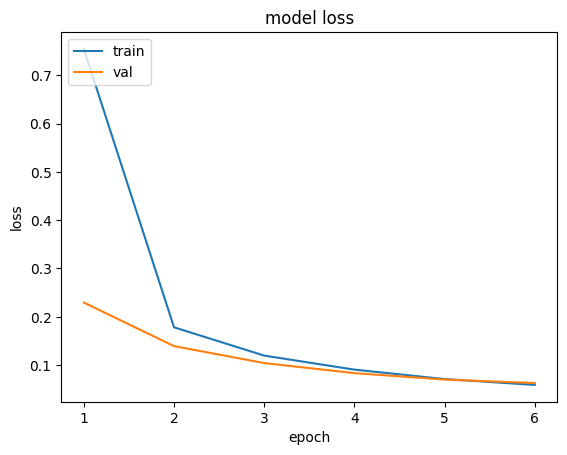

In [172]:
# GRU
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

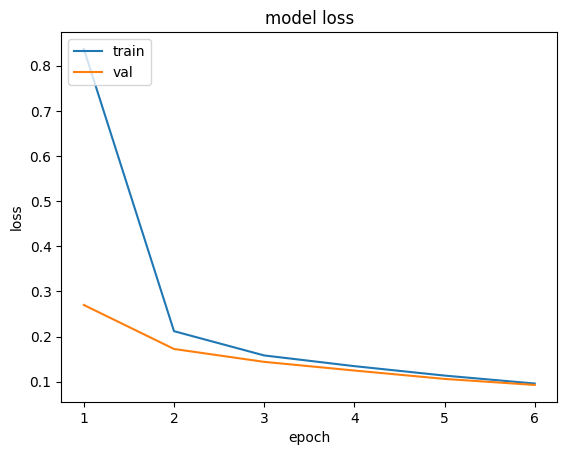

In [167]:
#LSTM
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

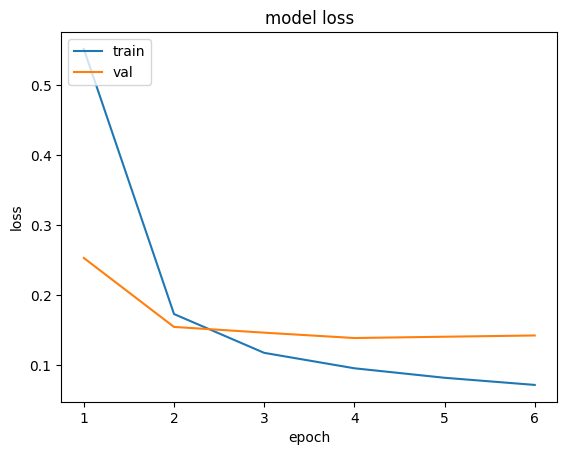

In [ ]:
# epochs = range(1, len(history.history['val_loss']) + 1)
# plt.plot(epochs, history.history['loss'])
# plt.plot(epochs, history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

## 모델저장

#### 1. 모델저장 (h5)

In [ ]:
# SavedModel 포맷(google에서 만듦), HDF5 포맷 2가지로 가능
# h5 format
model.save('h5-model.h5') # 파이토치를 tensorflow로 바꾸거나, 그 반대로 바꿀 때 수월하게 바꿀 수 있다

In [ ]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

# 모델 검증
loss, acc = h5_model.evaluate(X_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         4072832   
                                                                 
 lstm (LSTM)                 (None, None, 256)         394240    
                                                                 
 dense (Dense)               (None, None, 18)          4626      
                                                                 
Total params: 4,471,698
Trainable params: 4,471,698
Non-trainable params: 0
_________________________________________________________________
h5 model] loss: 0.15682, acc: 0.95133


#### 2. SavedModel 포맷으로 저장

In [ ]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [ ]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         4072832   
                                                                 
 lstm (LSTM)                 (None, None, 256)         394240    
                                                                 
 dense (Dense)               (None, None, 18)          4626      
                                                                 
Total params: 4,471,698
Trainable params: 4,471,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

saved_model] loss: 0.15682, acc: 0.95133


### 3. Checkpoint 저장
- 모델 전체가 아니라 가중치만 저장하고 싶다
- 학습했던 것에서 이어서 하고 싶을 때 쓴다
- 기본적으로 모델의 weight만 저장한다
- = 중간저장 역할

In [ ]:
embedding_dim = 128
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(Dense(tag_size, activation=('softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt',
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='val_loss',
                                                verbose=1)


model.fit(X_train, y_train,
          validation_split = 0.1,
          batch_size = 128,
          epochs=10,
          callbacks=[checkpoint] # checkpoint를 설정해서 저장해야 한다
          )

Epoch 1/10
270/270 [==============================] - ETA: 0s - loss: 0.6284 - accuracy: 0.8667
Epoch 1: val_loss improved from inf to 0.33446, saving model to tmp_checkpoint.ckpt
270/270 [==============================] - 30s 96ms/step - loss: 0.6284 - accuracy: 0.8667 - val_loss: 0.3345 - val_accuracy: 0.9098
Epoch 2/10
270/270 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9393
Epoch 2: val_loss improved from 0.33446 to 0.18695, saving model to tmp_checkpoint.ckpt
270/270 [==============================] - 8s 30ms/step - loss: 0.2311 - accuracy: 0.9393 - val_loss: 0.1870 - val_accuracy: 0.9471
Epoch 3/10
270/270 [==============================] - ETA: 0s - loss: 0.1486 - accuracy: 0.9564
Epoch 3: val_loss improved from 0.18695 to 0.16119, saving model to tmp_checkpoint.ckpt
270/270 [==============================] - 4s 16ms/step - loss: 0.1486 - accuracy: 0.9564 - val_loss: 0.1612 - val_accuracy: 0.9516
Epoch 4/10
270/270 [==============================] - E

In [ ]:
# 모델 체크포인트 로드 전
loss, acc = model.evaluate(X_test, y_test)
print(f'체크포인트 로드 전: loss: {loss:.4f}, acc: {acc:.4f}')

300/300 [==============================] - 1s 4ms/step - loss: 0.1697 - accuracy: 0.9531
체크포인트 로드 전: loss: 0.1697, acc: 0.9531


In [ ]:
# 체크포인트 파일을 모델에 로드
model.load_weights('tmp_checkpoint.ckpt')
loss, acc = model.evaluate(X_test, y_test)
print(f'체크포인트 로드 후: loss: {loss:.4f}, acc: {acc:.4f}')

300/300 [==============================] - 1s 4ms/step - loss: 0.1527 - accuracy: 0.9529
체크포인트 로드 후: loss: 0.1527, acc: 0.9529


참고자료
-  도서 : 파이썬 딥러닝 텐서플로(정보문화사)
    - https://github.com/lovedlim/tensorflow/blob/main/Part%203/3.4_model_configuration.ipynb
